In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

In [2]:
# data
df_to_eda = pd.read_csv("data/curated/df_to_eda.csv")

In [3]:
# how much data we have on school_step
df_to_eda["school_step"].value_counts()

Médio & Pré-Vestibular    35307
Fundamental II            33390
Fundamental I             18144
Name: school_step, dtype: int64

Como podemos ver aqui, existe uma quantidade bem interessante entre as 3 classes que iremos prever. No FUND-I temos um pouco mais da metade das outras duas classes, mas acreditamos que não será um problema.

# Tamanho das sentenças

As questões vão de 1 à 62275 caracteres por questão
O valor mediano e médio de caracteres por questão é de 161 e de 291, respectivamente.


<AxesSubplot:xlabel='question_c6', ylabel='Count'>

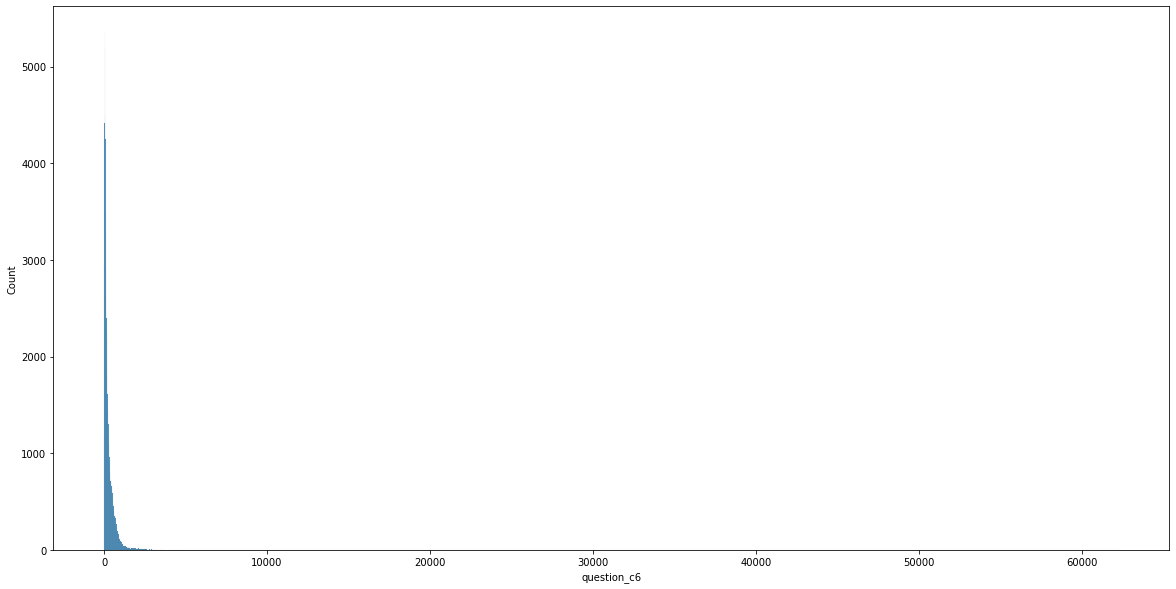

In [4]:
max = df_to_eda['question_c6'].str.len().max()
min = df_to_eda['question_c6'].str.len().min()
median = df_to_eda['question_c6'].str.len().median()
mean = df_to_eda['question_c6'].str.len().mean()

print('As questões vão de %d à %d caracteres por questão' % (min, max))
print('O valor mediano e médio de caracteres por questão é de %d e de %d, respectivamente.' %
(median, mean))

fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(df_to_eda['question_c6'].str.len(), ax = ax)

Curiosamente temos muitas sentenças de tamanho 1. Provavelmente esses itens não representam nada e precisam ser excluídos.

In [5]:
df_to_eda['question_c6'].astype("str").apply(len).sort_values()

80830        1
4024         1
48188        1
78086        1
75771        1
         ...  
58817    60452
69735    61967
79472    62275
23050    62275
42658    62275
Name: question_c6, Length: 86841, dtype: int64

In [6]:
# looking at those items with sentence length of 1
df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) == 1]

,question_c6,bulletType,school_step
4024,p,4,Médio & Pré-Vestibular
7408,c,4,Fundamental II
10679,p,4,Fundamental II
11814,p,4,Médio & Pré-Vestibular
13716,r,2,Fundamental II
28603,x,2,Médio & Pré-Vestibular
32239,x,2,Médio & Pré-Vestibular
37554,r,4,Fundamental II
43794,p,4,Médio & Pré-Vestibular
44475,p,4,Médio & Pré-Vestibular


In [7]:
# filtering length 1 sentence size items
df_c1 = df_to_eda[df_to_eda["question_c6"].astype("str").apply(len) != 1]


In [8]:
# let's check the length of these sentences again
df_c1['question_c6'].astype("str").apply(len).sort_values()


67100        2
14616        2
47504        2
57554        2
50341        2
         ...  
58817    60452
69735    61967
79472    62275
42658    62275
23050    62275
Name: question_c6, Length: 86816, dtype: int64

In [9]:
df_c1["sentence_len"] = df_c1["question_c6"].astype("str").apply(len)

/tmp/ipykernel_66856/2090979127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c1["sentence_len"] = df_c1["question_c6"].astype("str").apply(len)


In [10]:
df_c1

,question_c6,bulletType,school_step,sentence_len
0,base conhecimentos sobre compositor john cage ...,2,Fundamental II,345
1,achar número somado igual inverso equações rep...,2,Fundamental II,62
2,complete espaços abaixo artigos determinados i...,4,Fundamental II,397
3,chuva ácida fenômeno provocado poluição atmosf...,2,Fundamental II,97
4,anexe nesse espaço foto ilustração,4,Fundamental I,34
...,...,...,...,...
86836,leia reportagem responda questão sobre pergunt...,2,Fundamental I,100
86837,responder questão leia trecho conto prefácio h...,2,Médio & Pré-Vestibular,1424
86838,pais surgiu skate,2,Fundamental II,17
86839,machos fêmeas mosquitos gênero aedes vivem loc...,2,Fundamental II,405


Sabemos que apesar de termo removido as stopwords, existem palavras específicas desse contexto que não representam muito para o problema que temos. Porém, para melhor visualizá-las, vamos plotar uma wordcloud em todas as sentenças do dataset.

In [11]:
# plot wordcloud

tokens = []

text_list = df_c1["question_c6"].values
_ = [tokens.extend(word_tokenize(str(text))) for text in text_list]


In [12]:
counting_tokens = Counter(tokens)

In [13]:
count_tokens_df = pd.DataFrame({"words": counting_tokens.keys(), "count": counting_tokens.values()})

In [14]:
count_tokens_df.sort_values(["count"], ascending=False)

,words,count
703,the,21275
266,texto,16179
2,sobre,15918
131,ser,12483
39,alternativa,11670
...,...,...
95966,jcnet,1
95967,sempredadores,1
95968,avancam,1
22061,loosely,1


In [21]:
count_tokens_df["q_groups"] = pd.qcut(count_tokens_df["count"], q=[.1, .5, .6, .7, .8, .9, .99, .999, 1])
count_tokens_df.value_counts("q_groups")

q_groups
(0.999, 2.0]           75303
(2.0, 3.0]             15736
(9.0, 25.0]            13448
(25.0, 378.0]          12616
(3.0, 5.0]             11392
(5.0, 9.0]             10619
(378.0, 2454.122]       1264
(2454.122, 21275.0]      141
dtype: int64

In [24]:
count_tokens_df["q_groups"] = count_tokens_df["q_groups"].astype("str")
count_tokens_df

,words,count,q_groups
0,base,4434,"(2454.122, 21275.0]"
1,conhecimentos,1632,"(378.0, 2454.122]"
2,sobre,15918,"(2454.122, 21275.0]"
3,compositor,71,"(25.0, 378.0]"
4,john,277,"(25.0, 378.0]"
...,...,...,...
140514,alunosonline,1,"(0.999, 2.0]"
140515,planetainvertebrados,1,"(0.999, 2.0]"
140516,especies_ver,1,"(0.999, 2.0]"
140517,id_categoria,1,"(0.999, 2.0]"


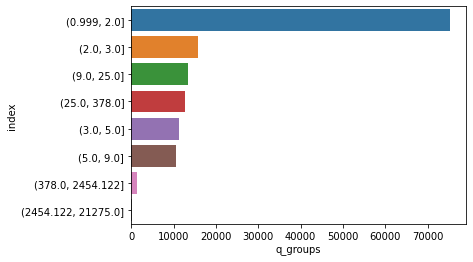

In [27]:
bins_to_plot = count_tokens_df["q_groups"].value_counts().reset_index()
_ = sns.barplot(x="q_groups", y="index", data=bins_to_plot)
plt.show()

Mais de 90% das palavras aparecem de 1 a 25 vezes, precisamos investigar essas palavras.

In [30]:
less_than_25_df = count_tokens_df[count_tokens_df["count"] <= 25]

In [31]:
less_than_25_df

,words,count,q_groups
5,cage,3,"(2.0, 3.0]"
22,orientados,10,"(9.0, 25.0]"
43,somado,22,"(9.0, 25.0]"
45,inverso,25,"(9.0, 25.0]"
54,indeterminados,4,"(3.0, 5.0]"
...,...,...,...
140514,alunosonline,1,"(0.999, 2.0]"
140515,planetainvertebrados,1,"(0.999, 2.0]"
140516,especies_ver,1,"(0.999, 2.0]"
140517,id_categoria,1,"(0.999, 2.0]"
